In [1]:
from deepface import DeepFace
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import os
import pickle

In [3]:
def get_embeddings(dataset_path):
    embeddings = []
    labels = []
    
    for person in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person)
        if not os.path.isdir(person_path):
            continue
        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)
            try:
                result = DeepFace.represent(img_path=img_path, model_name="Facenet", enforce_detection=False)
                embeddings.append(result[0]["embedding"])
                labels.append(person)
            except Exception as e:
                print(f"HATA - {img_path} alınamadı:", e)
    
    return embeddings, labels


In [4]:
train_embeddings, train_labels = get_embeddings("dataset/train")

model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_embeddings, train_labels)

# Modeli kaydetmek istersen
with open("face_knn_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model başarıyla eğitildi.")


✅ Model başarıyla eğitildi.


In [12]:
from deepface import DeepFace
import os

def get_embeddings(dataset_path):
    embeddings = []
    labels = []

    for person in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person)
        if not os.path.isdir(person_path):
            continue
        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)
            try:
                result = DeepFace.represent(img_path=img_path, model_name="Facenet", enforce_detection=False)
                embeddings.append(result[0]["embedding"])
                labels.append(person)
            except Exception as e:
                print(f"HATA - {img_path} alınamadı:", e)

    return embeddings, labels

# Test verisini al
test_embeddings, test_labels = get_embeddings("dataset/test")

# Tahminleri yap
predicted_labels = model.predict(test_embeddings)


In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matris oluştur
cm = confusion_matrix(test_labels, predicted_labels, labels=model.classes_)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Purples")
plt.title("📊 Confusion Matrix")
plt.show()


NameError: name 'test_labels' is not defined

In [6]:
# Test verisi için embedding çıkarımı
test_embeddings, test_labels = get_embeddings("dataset/test")

# Eğitilen model ile tahmin yap
predicted = model.predict(test_embeddings)

# Sonuçları değerlendir
print(classification_report(test_labels, predicted))


              precision    recall  f1-score   support

        Aysu       0.86      0.79      0.83        24
       Kader       0.91      0.88      0.89        24
       Selin       0.78      0.88      0.82        24

    accuracy                           0.85        72
   macro avg       0.85      0.85      0.85        72
weighted avg       0.85      0.85      0.85        72



In [15]:
from deepface import DeepFace

def get_embeddings_with_model(dataset_path, model_name="VGG-Face"):
    embeddings = []
    labels = []

    for person in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person)
        if not os.path.isdir(person_path):
            continue
        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)
            try:
                result = DeepFace.represent(img_path=img_path, model_name=model_name, enforce_detection=False)
                embeddings.append(result[0]["embedding"])
                labels.append(person)
            except Exception as e:
                print(f"HATA - {img_path} alınamadı:", e)
    
    return embeddings, labels


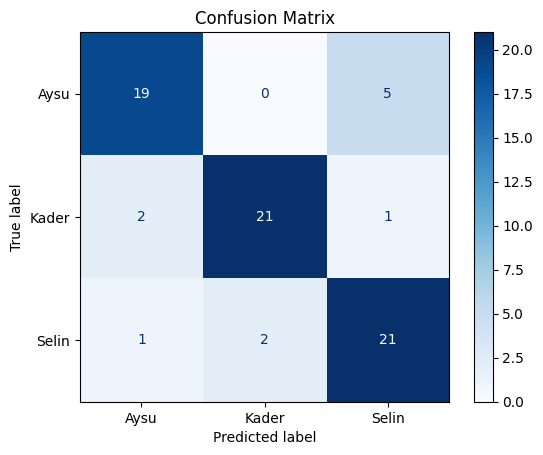

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# KNN modelin zaten eğitilmişti, test verinle tahmin yapmıştın:
predicted = model.predict(test_embeddings)

# Confusion matrix'i oluştur
cm = confusion_matrix(test_labels, predicted, labels=model.classes_)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



⭐ SVM Sonuçları:
              precision    recall  f1-score   support

        Aysu       1.00      0.71      0.83        24
       Kader       1.00      0.88      0.93        24
       Selin       0.71      1.00      0.83        24

    accuracy                           0.86        72
   macro avg       0.90      0.86      0.86        72
weighted avg       0.90      0.86      0.86        72



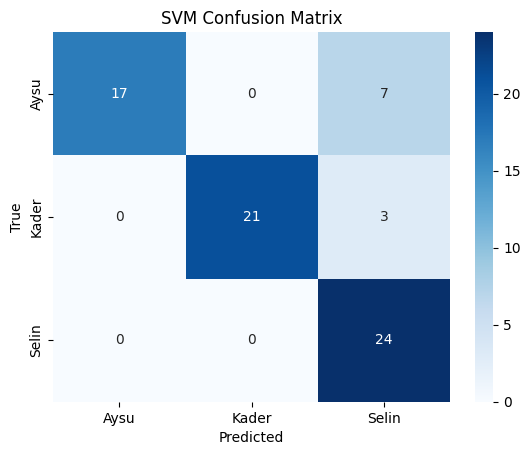


⭐ Random Forest Sonuçları:
              precision    recall  f1-score   support

        Aysu       1.00      0.71      0.83        24
       Kader       0.96      0.92      0.94        24
       Selin       0.72      0.96      0.82        24

    accuracy                           0.86        72
   macro avg       0.89      0.86      0.86        72
weighted avg       0.89      0.86      0.86        72



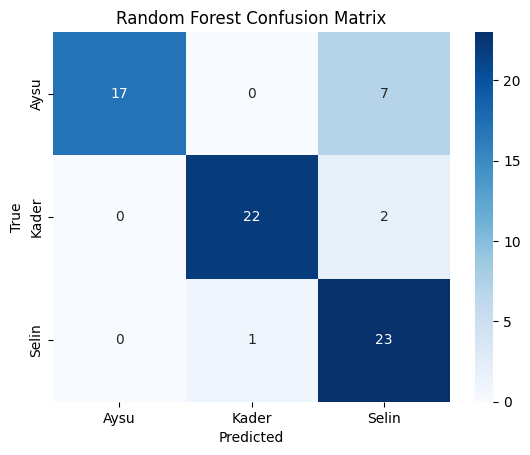


⭐ Logistic Regression Sonuçları:
              precision    recall  f1-score   support

        Aysu       0.94      0.71      0.81        24
       Kader       0.91      0.88      0.89        24
       Selin       0.71      0.92      0.80        24

    accuracy                           0.83        72
   macro avg       0.86      0.83      0.83        72
weighted avg       0.86      0.83      0.83        72



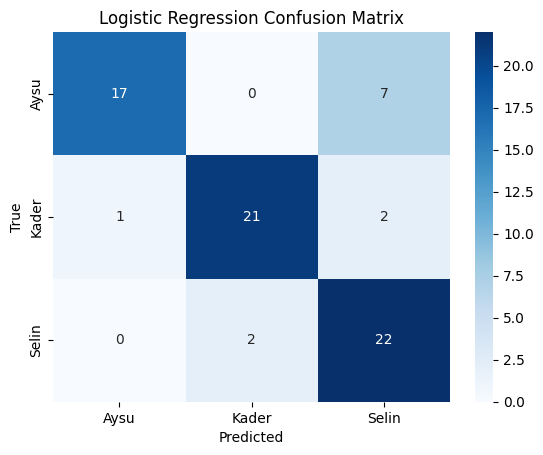


⭐ MLP Sonuçları:
              precision    recall  f1-score   support

        Aysu       0.89      0.71      0.79        24
       Kader       1.00      0.88      0.93        24
       Selin       0.72      0.96      0.82        24

    accuracy                           0.85        72
   macro avg       0.87      0.85      0.85        72
weighted avg       0.87      0.85      0.85        72



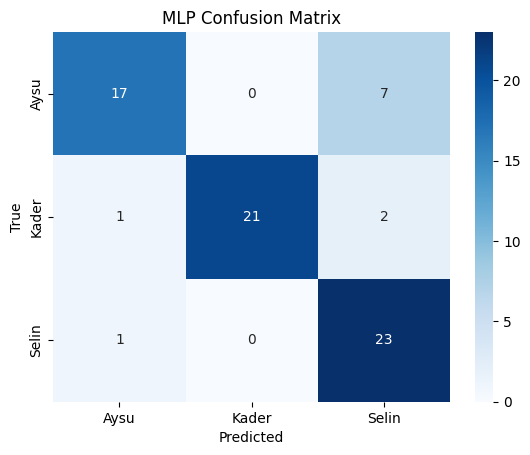

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "MLP": MLPClassifier(max_iter=1000)
}

for name, clf in models.items():
    print(f"\n⭐ {name} Sonuçları:")
    clf.fit(train_embeddings, train_labels)
    preds = clf.predict(test_embeddings)
    
    # Rapor
    print(classification_report(test_labels, preds))

    # Confusion matrix
    cm = confusion_matrix(test_labels, preds, labels=clf.classes_)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
